<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D0%B8_%D0%BF%D0%BE%D0%B6%D0%B0%D1%80%D0%BE%D0%B2_%D0%B2_%D0%9F%D0%BE%D1%80%D1%82%D1%83%D0%B3%D0%B0%D0%BB%D0%B8%D0%B8_%22_%D0%BD%D0%B0_Kaggle%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ООО "Университет Цифровых Технологий платформа 3"

###Подключаем необходимые модули.

In [ ]:
from tensorflow.keras.models import Sequential, load_model # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # Подключаем класс Dense - полносвязный слой, и Flatten - данные выстраиваем в линию, одномерные
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical

import tensorflow as tf # импортируем tensorflow

# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # для построения матрицы ошибок
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # для нормализации данных

import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Библиотека pandas

import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Задача регрессии, цель которой состоит в том, чтобы спрогнозировать площадь выгоревших лесных пожаров в северо-восточном регионе Португалии с использованием метеорологических и других данных.

Загрузите из дата сета базы метеорологических и других данных - тренировочную и валидационную, а также базу для тестирования. Подайте дата сет в нейронную сеть, постаравшись добиться максимальной точности распознавания. Для улучшения обучения можно использовать также дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора Adam и прочие гипер параметры. Результаты рекомендуется заносить в таблицу для себя, чтобы можно было потом воспроизвести лучший вариант. Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Ответ можно улучшить и подавать результат несколько раз.

Содержание датасета: Набор данных содержится в 3 массивах (train, test, val) и содержит метки размера площади пожара. Меток нет только в тестовом наборе, их нужно спрогнозировать нейронной сетью и отослать на соревнование в виде файла csv. Существует 517 наборов данных, из них 439 обучающая выборка и 78 тестовая.

Наборы данных уже нормализованы и готовы к подачи, для обучения в нейронной сети.

### Наборы данных до нормализации выглядел следующим образом:

1. Пространственная координата оси X - x на карте парка Монтесиньо: от 1 до 9
2. Пространственная координата оси Y - y на карте парка Монтесиньо: от 2 до 9
3. месяц - месяц года: с января по декабрь
4. день - день недели: от "пн" до "вс"
5. Индекс FFMC - FFMC из системы FWI: от 18,7 до 96,20
6. Индекс DMC - DMC из системы FWI: от 1,1 до 291,3
7. Индекс DC - DC от системы FWI: от 7,9 до 860,6
8. Индекс ISI - ISI от системы FWI: от 0.0 до 56.10
9. temp - температура в градусах Цельсия: от 2,2 до 33,30
10. RH - относительная влажность воздуха в %: от 15,0 до 100
11. ветер - скорость ветра в км/ч: от 0,40 до 9,40
12. дождь - наружный дождь в мм/м2 : от 0,0 до 6,4
13. площадь - сожженная площадь леса (в га): от 0,00 до 1090,84
(эта выходная переменная очень смещена в сторону 0.0, поэтому имеет смысл моделировать с помощью логарифмического преобразования).



Ссылка на задание: https://www.kaggle.com/t/e594f270a7554fe5b3ce37e557d9d883



### Анализ и обработка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install kaggle

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/datasets/kaggle/

/content/drive/MyDrive/datasets/kaggle


In [ ]:
#!cp './kaggle.json' '/root/.kaggle/kaggle.json' # установка ключей

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!cp '/content/drive/MyDrive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json' # альтернативный вариант

In [ ]:
!kaggle competitions download -c udt-3-regression

sampleSubmissionForest.csv: Skipping, found more recently modified local copy (use --force to force download)
x_train.npy: Skipping, found more recently modified local copy (use --force to force download)
x_test.npy: Skipping, found more recently modified local copy (use --force to force download)
y_train.npy: Skipping, found more recently modified local copy (use --force to force download)
yTrainScaled.bin: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')

In [ ]:
x_test

array([[0.625     , 0.42857143, 0.27272727, 0.66666667, 0.9316129 ,
        0.43211578, 0.79582503, 0.12477718, 0.61414791, 0.31764706,
        0.2       , 0.        ],
       [0.375     , 0.14285714, 0.27272727, 0.33333333, 0.9483871 ,
        0.34872502, 0.87205348, 0.14973262, 0.68488746, 0.14117647,
        0.4       , 0.        ],
       [0.75      , 0.28571429, 0.27272727, 0.83333333, 0.92129032,
        0.28187457, 0.8535241 , 0.11051693, 0.4244373 , 0.49411765,
        0.45555556, 0.        ],
       [0.375     , 0.42857143, 0.        , 0.        , 0.94193548,
        0.11095796, 0.08162308, 0.16042781, 0.48231511, 0.12941176,
        0.45555556, 0.        ],
       [0.125     , 0.28571429, 0.18181818, 0.83333333, 0.94709677,
        0.37939352, 0.75782808, 0.17112299, 0.58842444, 0.23529412,
        0.4       , 0.        ],
       [0.875     , 0.42857143, 0.18181818, 0.83333333, 0.96      ,
        0.53824948, 0.77260467, 0.24064171, 0.79099678, 0.11764706,
        0.3       ,

### Создаем нейронную сеть с полученными данными.

In [ ]:
# Обучаем модель полученными данными
def createModel(inputmy):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(inputmy,)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(400, activation='tanh'))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(200, activation='tanh'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['accuracy'])
    return model

In [ ]:
# Создаём пустую сеть при помощи функции createModel() с заданным аргументом
model = createModel(x_train.shape[1])
# Обучаем сеть
history = model.fit(x_train, 
                    y_train, 
                    epochs=500, # Количество эпох
                    batch_size=50, # Размер батча
                    validation_split=0.2, 
                    verbose=1) # Выводить процесс обучения на каждой эпохе


Epoch 1/500
8/8 [==============================] - 1s 43ms/step - loss: 0.6325 - accuracy: 0.3134 - val_loss: 0.2192 - val_accuracy: 0.4432
Epoch 2/500
8/8 [==============================] - 0s 16ms/step - loss: 0.2363 - accuracy: 0.4644 - val_loss: 0.2049 - val_accuracy: 0.4432
Epoch 3/500
8/8 [==============================] - 0s 17ms/step - loss: 0.2209 - accuracy: 0.4644 - val_loss: 0.1752 - val_accuracy: 0.4432
Epoch 4/500
8/8 [==============================] - 0s 18ms/step - loss: 0.1565 - accuracy: 0.4786 - val_loss: 0.1709 - val_accuracy: 0.4432
Epoch 5/500
8/8 [==============================] - 0s 17ms/step - loss: 0.1500 - accuracy: 0.4786 - val_loss: 0.1734 - val_accuracy: 0.4432
Epoch 6/500
8/8 [==============================] - 0s 19ms/step - loss: 0.1416 - accuracy: 0.4786 - val_loss: 0.1703 - val_accuracy: 0.4432
Epoch 7/500
8/8 [==============================] - 0s 20ms/step - loss: 0.1410 - accuracy: 0.4786 - val_loss: 0.1665 - val_accuracy: 0.4432
Epoch 8/500
8/8 [===

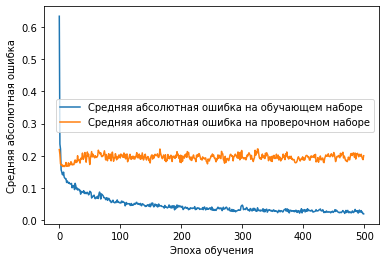

In [ ]:
# графическое отображение работы сети
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/datasets/kaggle/my_model') # сохраним обученную модель

INFO:tensorflow:Assets written to: /content/drive/MyDrive/datasets/kaggle/my_model/assets


### Проверим результат работы на тестовых данных

In [ ]:
prediction = model.predict(x_test).flatten() # сделаем предсказание нашей моделью тестовой выборки
# зададим ответ в нужном формате для соревнования в kaggle
submission = pd.DataFrame({"Id":range(1,len(prediction)+1),"Label":prediction})

In [ ]:
submission.head()

,Id,Label
0,1,0.098012
1,2,0.288823
2,3,0.089241
3,4,0.000320
4,5,0.033490


In [ ]:
# запишем ответ в файл
submission = submission.to_csv('./submission01_forest_file.csv',index=False,header=True)

In [ ]:
# передадим файл для участия в соревновании на kaggle
!kaggle competitions submit -c udt-3-regression -f submission01_forest_file.csv -m "Message"

100% 1.17k/1.17k [00:01<00:00, 763B/s]
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 64, in main
    print(out, end='')
UnicodeEncodeError: 'latin-1' codec can't encode characters in position 26-36: ordinal not in range(256)
